# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "31"
COLLABORATORS = "Aleksandra Grot 407392, Malgorzata Serwanska 405044, Adam Lewinski 407657"

---

## Zestaw zadań 2: Badanie intensywności procesów punktowych (część 1)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
import math
sns.set() 
sns.set_theme(style="whitegrid")

In [4]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    n=sp.stats.poisson.rvs(intensity*(x_lim[-1]-x_lim[0])*(y_lim[-1]-y_lim[0]))
    X=[]
    Y=[]
    for i in range(n):
        X.append(np.random.random_sample()*(x_lim[-1]-x_lim[0])+x_lim[0])
        Y.append(np.random.random_sample()*(y_lim[-1]-y_lim[0])+y_lim[0])
    d={"X":X,"Y":Y}
    df=pd.DataFrame(data=d)
    return df

def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    maximize = sp.optimize.minimize(lambda x : -intensity_function(x[0],x[1]),[1,1],
                                    bounds = [(x_lim[0],x_lim[1]), (y_lim[0],y_lim[1])])
    df = homogeneous_poisson_on_rectangle(intensity_function(maximize["x"][0],maximize["x"][1]),
                                          [x_lim[0],x_lim[-1]],[y_lim[0],y_lim[-1]])
    dX = df["X"]
    dY = df["Y"]
    pop_list = []
    x = dX.values.tolist()
    y = dY.values.tolist()
    
    for i in range (df.shape[0]):
        r = np.random.random_sample()
        if(r <= 1-intensity_function(x[i],y[i])/intensity_function(maximize["x"][0],maximize["x"][1])):
            pop_list.append(i)
    pop_list.reverse()
    for elem in pop_list:
        x.pop(elem)
        y.pop(elem)
    d={"X":x,"Y":y}
    df=pd.DataFrame(data=d)
    return df
    
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    df = homogeneous_poisson_on_rectangle(parent_intensity,[x_lim[0]-cluster_radius,x_lim[1]+cluster_radius]
                                                          ,[y_lim[0]-cluster_radius,y_lim[1]+cluster_radius])
    x=[]
    y=[]
    def homo_circle(intensity, x, y, r):
        n=sp.stats.poisson.rvs(intensity*np.pi*r*r)
        X=[]
        Y=[]
        for i in range(n):
            alpha = 2 * np.pi * np.random.random_sample()
            c_r = r * np.sqrt(np.random.random_sample())
            X.append(c_r * np.cos(alpha) + x)
            Y.append(c_r * np.sin(alpha) + y)
        return X,Y
    
    for i in range(df.shape[0]):
        AA,BB = homo_circle(daughter_intensity,df["X"].tolist()[i],df["Y"].tolist()[i],cluster_radius)
        c = zip(AA, BB)
        for a,b in c:
            if a>x_lim[0] and a<x_lim[1] and b>y_lim[0] and b<y_lim[1]:
                x.append(a)
                y.append(b)
    d={"X":x,"Y":y}
    df=pd.DataFrame(data=d)
    return df
        
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    df = homogeneous_poisson_on_rectangle(parent_intensity,[x_lim[0]-4*cluster_sigma,x_lim[1]+4*cluster_sigma]
                                                          ,[y_lim[0]-4*cluster_sigma,y_lim[1]+4*cluster_sigma])
    x = []
    y = []
    X = []
    Y = []
    for index, row in df.iterrows():
        n=sp.stats.poisson.rvs(mean_cluster_size)
        x.append(np.random.normal(row["X"], cluster_sigma, n))
        y.append(np.random.normal(row["Y"], cluster_sigma, n))
    for a,b in zip(x,y):
        for aa,bb in zip(a,b):
            if aa>x_lim[0] and aa<x_lim[1] and bb>y_lim[0] and bb<y_lim[1]:
                X.append(aa)
                Y.append(bb)
    d={"X":X,"Y":Y}
    df=pd.DataFrame(data=d)
    return df
    
    


### Przygotowanie danych (5 pkt)

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkłada Poissona:
 - intensywność procesu: 20
 
Niejednorodny rozkład Poissona:
 - intensywność procesu: f(x, y) = $10(cos(\frac{\pi}{4} x)+1)$

Rozkład Materna:
 - intensywność procesu macierzystego: 0.15
 - intensywność procesu potomnego: 15
 - promień klastra: 1.25
 
Rozkład Thomasa:
 - intensywność procesu macierzystego: 0.3
 - średnia liczebność klastra: 20
 - odchylenie standardowe klastra: 0.75

Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [-10, 10]
 - zakres wartości współrzędnej y: [-5, 5]

In [5]:
# YOUR CODE HERE
df_hom = homogeneous_poisson_on_rectangle(20, [-10,10], [-5,5])
df_un = unhomogeneous_poisson_on_rectangle(lambda x,y : 10*(np.cos(x/4*np.pi)+1), [-10,10], [-5,5])
df_mat = materna_on_rectangle(0.15,15,1.25, [-10,10], [-5,5])
df_thomas = thomas_on_rectangle(0.3,20,0.75,[-10,10], [-5,5])

### Zadanie 1: Badanie intensywności procesu punktowego metodą szacowania lokalnego (20 pkt)

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie prostokątnych podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie prostokątnych podobszarów.

Następnie wykorzystaj przygotowane funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Ustaw podział obszaru na 40 podobszarów wzdłuż osi $x$ i 20 podobszarów wzdłuż osi $y$.

Przedstaw wyniki analizy graficznie w postaci histogramów dwuwymiarowych z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

#### a) Przygotowanie funkcji

In [6]:
def point_count_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    bin_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[7, 2], [4, 5]])]
    """
    # YOUR CODE HERE
    X = np.linspace(x_lim[0],x_lim[1], bins[0]+1)
    Y = np.linspace(y_lim[0],y_lim[1], bins[1]+1)
    H,X,Y = np.histogram2d(x = points["X"], y = points["Y"], bins=(X,Y))
    return [X,Y,H]

def intensity_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z wartością intensywności przypisaną do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[9, 12], [13, 8]])]
    """
    # YOUR CODE HERE
    X,Y,H = point_count_on_subregions(points, bins, x_lim, y_lim)
    H = H/(X[1]-X[0])/(Y[1]-Y[0])
    return [X,Y,H]

#### b) Wygenerowanie danych

In [7]:
## YOUR CODE HERE
X1,Y1,H1 = intensity_on_subregions(df_hom,[40,20],[-10,10],[-5,5])
X2,Y2,H2 = intensity_on_subregions(df_un,[40,20],[-10,10],[-5,5])
X3,Y3,H3 = intensity_on_subregions(df_mat,[40,20],[-10,10],[-5,5])
X4,Y4,H4 = intensity_on_subregions(df_thomas,[40,20],[-10,10],[-5,5])

#### c) Wizualizacja

/tmp/ipykernel_2545/1615286219.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[0,0].pcolormesh(X1,Y1,H1.T, cmap="viridis")
/tmp/ipykernel_2545/1615286219.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[0,1].pcolormesh(X2,Y2,H2.T, cmap="viridis")
/tmp/ipykernel_2545/1615286219.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax[1,0].pcolormesh(X3,Y3,H3.T, cmap="viridis")
/tmp/ipykernel_2545/1615286219.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; pleas

Text(0, 0.5, 'Y')

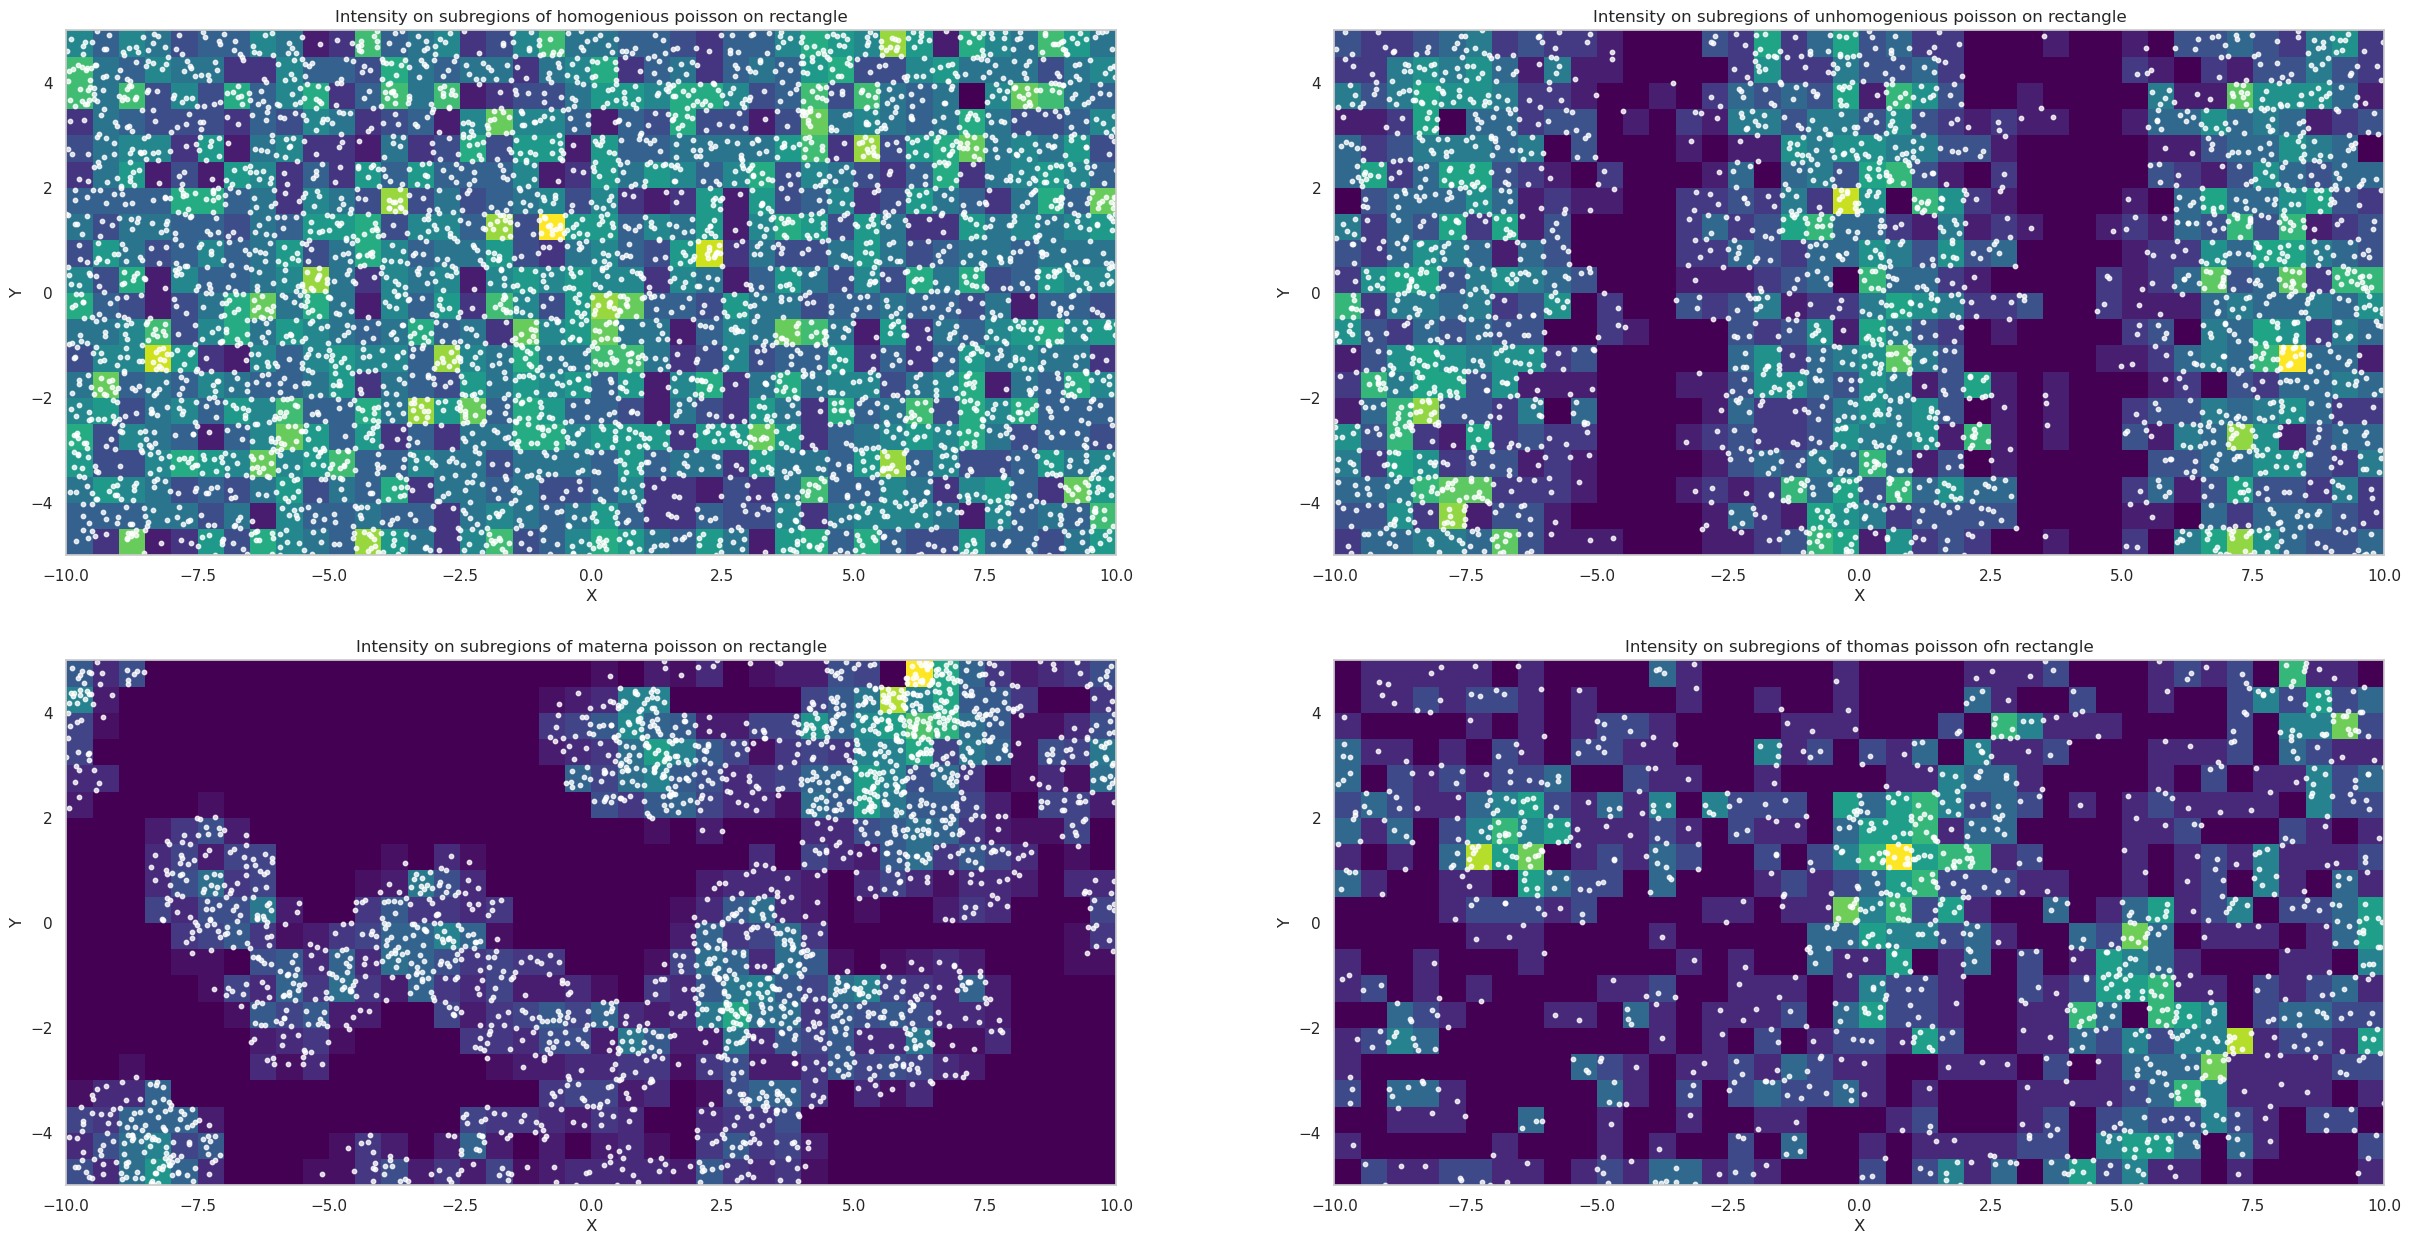

In [8]:
# YOUR CODE HERE
fig,ax=plt.subplots(2,2,figsize=(30,15))
ax[0,0].pcolormesh(X1,Y1,H1.T, cmap="viridis")
ax[0,0].scatter(x=df_hom["X"], y = df_hom["Y"], c="white", s = 10,alpha = 0.8 )
ax[0,0].axis("square")
ax[0,0].set_title("Intensity on subregions of homogenious poisson on rectangle")
ax[0,0].set_xlim([-10,10])
ax[0,0].set_ylim([-5,5])
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")

ax[0,1].pcolormesh(X2,Y2,H2.T, cmap="viridis")
ax[0,1].scatter(x=df_un["X"], y = df_un["Y"], c="white", s = 10,alpha = 0.8 )
ax[0,1].axis("square")
ax[0,1].set_title("Intensity on subregions of unhomogenious poisson on rectangle")
ax[0,1].set_xlim([-10,10])
ax[0,1].set_ylim([-5,5])
ax[0,1].set_xlabel("X")
ax[0,1].set_ylabel("Y")

ax[1,0].pcolormesh(X3,Y3,H3.T, cmap="viridis")
ax[1,0].scatter(x=df_mat["X"], y = df_mat["Y"], c="white", s = 10,alpha = 0.8 )
ax[1,0].axis("square")
ax[1,0].set_title("Intensity on subregions of materna poisson on rectangle")
ax[1,0].set_xlim([-10,10])
ax[1,0].set_ylim([-5,5])
ax[1,0].set_xlabel("X")
ax[1,0].set_ylabel("Y")

ax[1,1].pcolormesh(X4,Y4,H4.T, cmap="viridis")
ax[1,1].scatter(x=df_thomas["X"], y = df_thomas["Y"], c="white", s = 10,alpha = 0.8 )
ax[1,1].axis("square")
ax[1,1].set_title("Intensity on subregions of thomas poisson ofn rectangle")
ax[1,1].set_xlim([-10,10])
ax[1,1].set_ylim([-5,5])
ax[1,1].set_xlabel("X")
ax[1,1].set_ylabel("Y")


### Zadanie 2: Badanie intensywności procesu punktowego metodą funkcji jądrowych (25 pkt)

Przygotuj funkcję `intensity_on_kde()`, która będzie obliczać intensywność procesu punktowego z wykorzystaniem jądrowego estymatora funkcji intensywności danego wzorem:
$$ 	\grave{\lambda}(x,y) = \sum_{d_i < \tau} \frac{3}{\pi \tau^2} (1-\frac{d_i^2}{\tau^2})^2$$ 

gdzie: $d_i$ - odległość punktu od centrum funkcji jądrowej, $\tau$ - promień funkcji jądrowej.

Następnie wykorzystaj przygotowaną funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Wykonaj obliczania dla promienia funkcji jądrowej równego 1.5 i siatki  200x100 regularnie rozłożonych i pokrywających cały obszar punktów.

Przedstaw wyniki analizy graficznie w postaci wykresów konturowych z wypełnieniem z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

Uwaga! Funkcja przygotowana według powyższych wytycznych nie ma wbudowanego mechanizmu korekty na efekt brzegowy, w związu z czym będzie zaniżać wartość intensywności przy krawędziach analizowanego obszaru.

#### a) Przygotowanie funkcji

In [9]:
def intensity_on_kde(points, kernel_radius, grid, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    grid: list
        Lista określająca liczbę punktów w poziomie i pionie, dla których wyliczane będą wartości intensywności.
        Przykład: [10, 10]
    kernel_radius: float
        Liczba dodatnia określająca promień funkcji jądrowej.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: DataFrame
        Tablica zawierająca trzy kolumny - dwie ze współrzędnymi opisane jako "X" i "Y"
        oraz kolumnę z wartościami intensywności wyliczonymi dla tych współrzędnych opisaną jako "I".
    """
    # YOUR CODE HERE
    x = np.linspace(x_lim[0],x_lim[1],grid[0])
    y = np.linspace(y_lim[0],y_lim[1],grid[1])
    XY = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])
    X = [elem[0] for elem in XY]
    Y = [elem[1] for elem in XY]
    P = points.to_numpy()
    I = []
    dst = sp.spatial.distance_matrix(XY, P)
    dst[dst>=kernel_radius] = kernel_radius
    I = np.sum(((1-dst*dst/kernel_radius/kernel_radius)**2)*3/np.pi/kernel_radius/kernel_radius, axis=1)
    #for row in dst:
    #    t = ((1-dst[dst<kernel_radius]*dst[dst<kernel_radius]/kernel_radius/kernel_radius)**
    #             2/np.pi/kernel_radius/kernel_radius*3)
    #    I.append(np.sum(t))
        
    #for x in xx:
    #    for y in yy:
    #        suma = 0
    #        for index, row in points.iterrows():
    #            di = ((row["X"]-x)**2 + (row["Y"]-y)**2)**0.5
    #            if di<kernel_radius:
    #                suma += 3/np.pi/kernel_radius/kernel_radius * (1-di*di/kernel_radius/kernel_radius)**2
    #        X.append(x)
    #        Y.append(y)
    #        I.append(suma)
    
    d={"X":X,"Y":Y,"I":I}
    df=pd.DataFrame(data=d)
    return df
            
    

# b) Wygenerowanie danych

In [10]:
# YOUR CODE HERE
df_khom = intensity_on_kde(df_hom, 1.5,[200,100],[-10,10],[-5,5])
df_kun = intensity_on_kde(df_un, 1.5,[200,100],[-10,10],[-5,5])
df_kmat = intensity_on_kde(df_mat, 1.5,[200,100],[-10,10],[-5,5])
df_kthomas = intensity_on_kde(df_thomas, 1.5,[200,100],[-10,10],[-5,5])


#### c) Wizualizacja

Text(0, 0.5, 'Y')

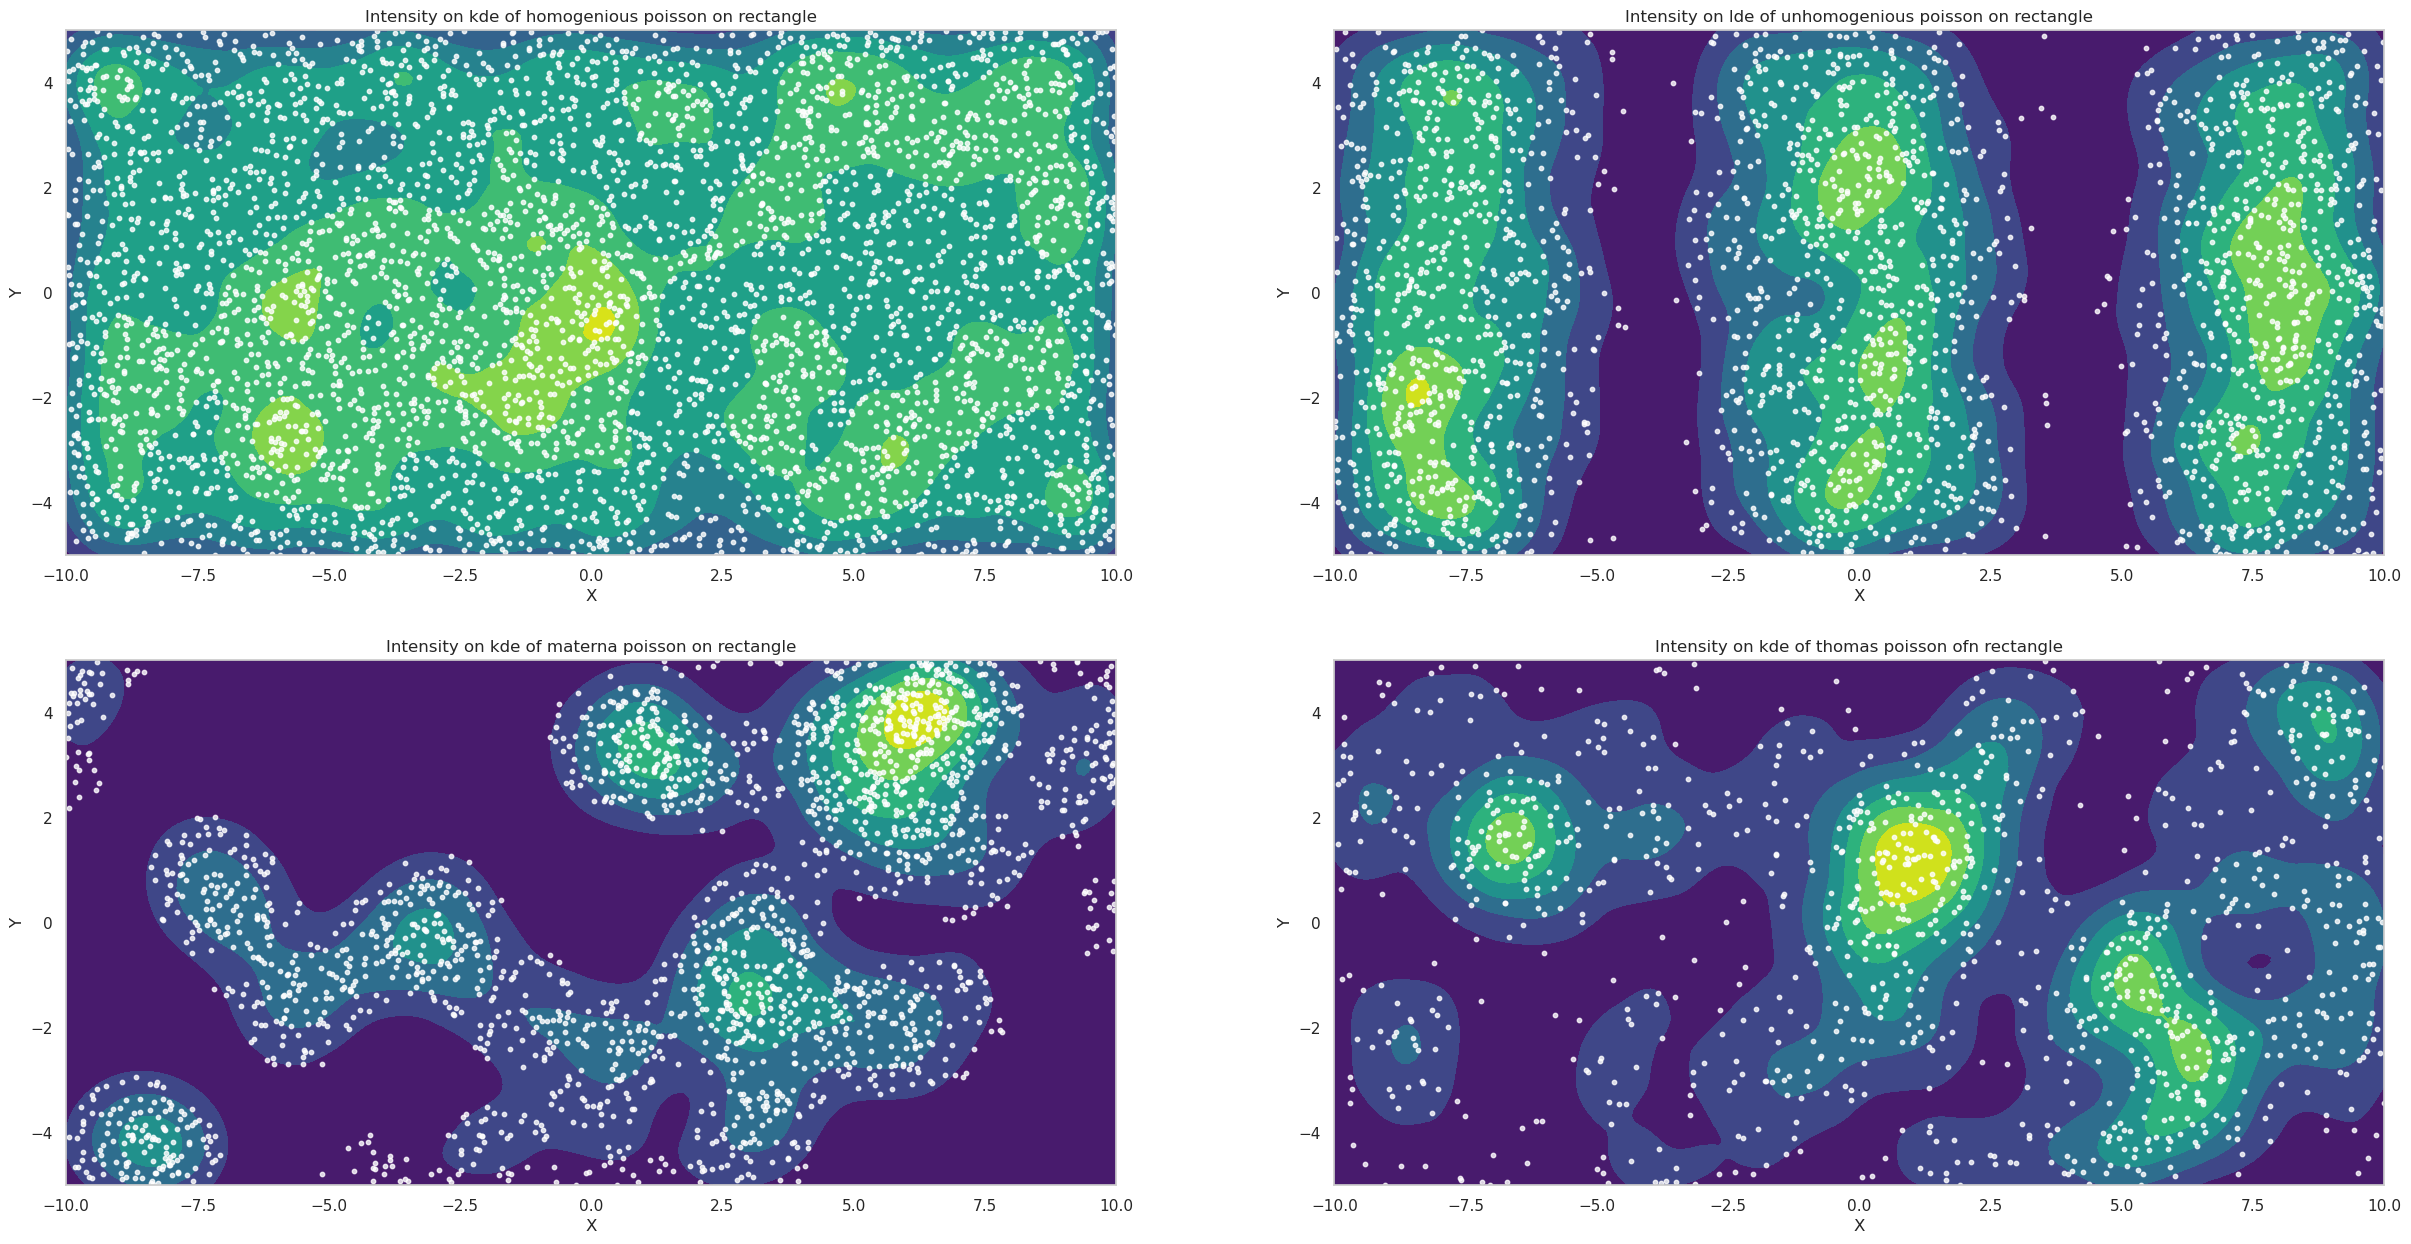

In [11]:
# YOUR CODE HERE
fig,ax=plt.subplots(2,2,figsize=(30,15))
ax[0,0].tricontourf(df_khom["X"],df_khom["Y"],df_khom["I"], cmap="viridis")
ax[0,0].scatter(x=df_hom["X"], y = df_hom["Y"], c="white", s = 10,alpha = 0.8 )
ax[0,0].axis("square")
ax[0,0].set_title("Intensity on kde of homogenious poisson on rectangle")
ax[0,0].set_xlim([-10,10])
ax[0,0].set_ylim([-5,5])
ax[0,0].set_xlabel("X")
ax[0,0].set_ylabel("Y")

ax[0,1].tricontourf(df_kun["X"],df_kun["Y"],df_kun["I"], cmap="viridis")
ax[0,1].scatter(x=df_un["X"], y = df_un["Y"], c="white", s = 10,alpha = 0.8 )
ax[0,1].axis("square")
ax[0,1].set_title("Intensity on lde of unhomogenious poisson on rectangle")
ax[0,1].set_xlim([-10,10])
ax[0,1].set_ylim([-5,5])
ax[0,1].set_xlabel("X")
ax[0,1].set_ylabel("Y")

ax[1,0].tricontourf(df_kmat["X"],df_kmat["Y"],df_kmat["I"], cmap="viridis")
ax[1,0].scatter(x=df_mat["X"], y = df_mat["Y"], c="white", s = 10,alpha = 0.8 )
ax[1,0].axis("square")
ax[1,0].set_title("Intensity on kde of materna poisson on rectangle")
ax[1,0].set_xlim([-10,10])
ax[1,0].set_ylim([-5,5])
ax[1,0].set_xlabel("X")
ax[1,0].set_ylabel("Y")

ax[1,1].tricontourf(df_kthomas["X"],df_kthomas["Y"],df_kthomas["I"], cmap="viridis")
ax[1,1].scatter(x=df_thomas["X"], y = df_thomas["Y"], c="white", s = 10,alpha = 0.8 )
ax[1,1].axis("square")
ax[1,1].set_title("Intensity on kde of thomas poisson ofn rectangle")
ax[1,1].set_xlim([-10,10])
ax[1,1].set_ylim([-5,5])
ax[1,1].set_xlabel("X")
ax[1,1].set_ylabel("Y")